Realizar una regresion lineal simple del DF de consumo de CO2

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn import linear_model
from sklearn.model_selection import train_test_split

In [2]:
#Carga y visionado del Dataframe
df = pd.read_csv("FuelConsumptionCo2.csv")
df

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1062,2014,VOLVO,XC60 AWD,SUV - SMALL,3.0,6,AS6,X,13.4,9.8,11.8,24,271
1063,2014,VOLVO,XC60 AWD,SUV - SMALL,3.2,6,AS6,X,13.2,9.5,11.5,25,264
1064,2014,VOLVO,XC70 AWD,SUV - SMALL,3.0,6,AS6,X,13.4,9.8,11.8,24,271
1065,2014,VOLVO,XC70 AWD,SUV - SMALL,3.2,6,AS6,X,12.9,9.3,11.3,25,260


In [5]:
df.describe()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


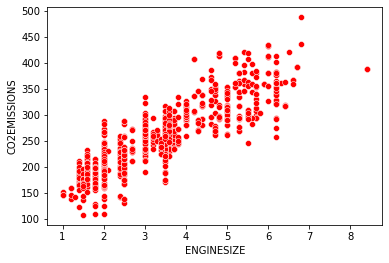

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


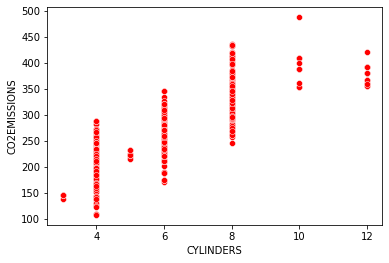

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


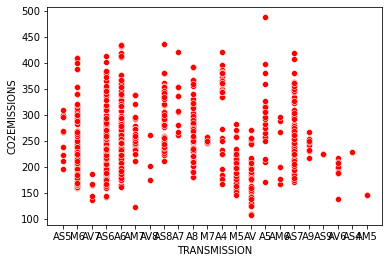

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


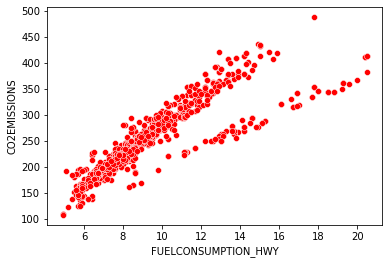

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


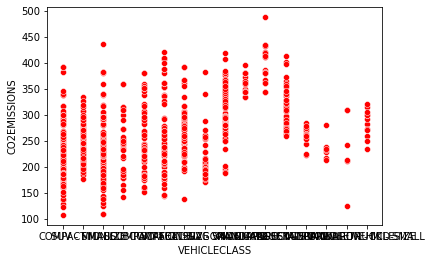

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


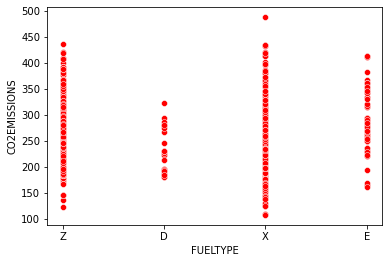

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


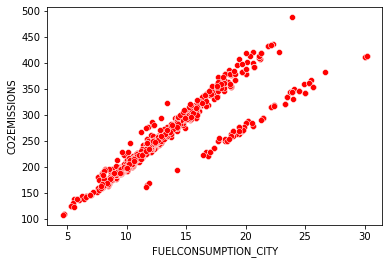

In [8]:
#Visionado relacion Emisiones C02 con diferentes columnas 

for i in ["ENGINESIZE","CYLINDERS", "TRANSMISSION", "FUELCONSUMPTION_HWY","VEHICLECLASS",
          "FUELTYPE","FUELCONSUMPTION_CITY"]:
    sns.scatterplot(df[i] ,df.CO2EMISSIONS, color="r")
    plt.show()

In [9]:
#Seleción de relacion entre consumo en ciudad y emisiones CO2
df[["FUELCONSUMPTION_CITY","CO2EMISSIONS"]]

,FUELCONSUMPTION_CITY,CO2EMISSIONS
0,9.9,196
1,11.2,221
2,6.0,136
3,12.7,255
4,12.1,244
...,...,...
1062,13.4,271
1063,13.2,264
1064,13.4,271
1065,12.9,260


In [10]:
#Definir la variable explicativa X y la variable de destino

X = df.FUELCONSUMPTION_CITY.values.reshape(1067,1) #Cambiar tamaño a una columna
y = df.CO2EMISSIONS.values
X.shape

(1067, 1)

In [11]:
#Entrenamiento con funcion train_test de sckikitlearn

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35) 

#Divide el data set en 4 para buscar la recta, el tamaño del test seria del 35%

In [12]:
# Asignacion de variables para realizar el algoritmo de regresion lineal

regresion_lineal = linear_model.LinearRegression()
regresion_lineal.fit(X_train, y_train)  #Entrenamiento del modelo

#Mostrar los coeficientes de la recta 
print ('w_1: ', regresion_lineal.coef_)
print ('w_0: ',regresion_lineal.intercept_)

w_1:  [13.95273205]
w_0:  70.40807373734873


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


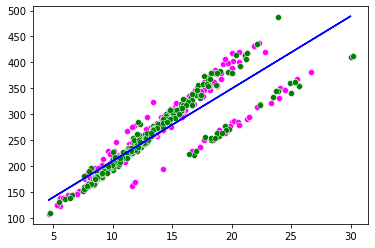

In [13]:
# Gráficar los datos obtenidos 

#Datos de entrenamiento
sns.scatterplot(X_train.flatten(),y_train.flatten(), color="magenta") 

#Datos de prueba
sns.scatterplot(X_test.flatten(),y_test.flatten(), color="green")  

#Regresion 
plt.plot(X_train, regresion_lineal.coef_[0]*X_train + regresion_lineal.intercept_, '-b') 

plt.show()

In [14]:
#Predicción 

yhat = regresion_lineal.predict(X_test)  

for i,j in zip(yhat,y_test):
    print("Predicción: ",i, "Valor real: ",j)
    break

Predicción:  250.39831719187694 Valor real:  260


In [15]:
#Predicción con r2_score

regresion_lineal.score(X_test,y_test) 

0.8124998701823501

In [16]:
#Predicción con r2_score ajustado

from sklearn.metrics import r2_score 
r2_score(y_test,yhat)

0.8124998701823501